# VGG-16

Tomado de: https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-3-vgg/

En primer lugar, importarmos las librerías necesarias. Importaremos las librerías de numpy, TensorFlow (éste será el framework sobre el que correrá Keras), Keras y unas librerías necesarias Scikit Learn, Pandas, etc.

In [1]:
import numpy as np  
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
#from keras.utils import plot_model
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint, CSVLogger  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

El conjunto de datos: https://www.cs.toronto.edu/~kriz/cifar.html

Es un conjunto de datos ampliamente usado "CIFAR-100". Este conjunto de datos consta de 600 imágenes por cada clase de un total de 100 clases. Se divide en 500 imágenes para entrenamiento y 100 imágenes para validación por cada clase. Las 100 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta "fina" (la clase, de entre las 100, a la que pertenece) y una etiqueta "gruesa" (correspondiente a su superclase).

In [2]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

convertir este array en su versión binaria

In [3]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

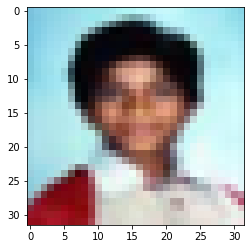

In [4]:
imgplot = plt.imshow(x_train_original[3])
plt.show()

Ahora se normalizan las imágenes. Esto es, dividiremos cada elemento de x_train_original y xtestoriginal por el numero de píxeles, es decir, 255. Con esto obtenemos que el array comprenderá valores de entre 0 y 1. Con esto el entrenamiento suele aportar mejores resultados.

In [5]:
x_train = x_train_original/255  
x_test = x_test_original/255  

Lo primero es especificar a Keras dónde se encuentran los canales. En un array de imágenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (channels first) o canales al final (channels last). En nuestro caso, vamos a definirlos al final.

In [6]:
K.set_image_data_format('channels_last')  

Cambiamos el tamaño de las imágenes a 48 píxeles

In [7]:
def resize_data(data):  
    data_upscaled = np.zeros((data.shape[0], 48, 48, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

x_train_resized = resize_data(x_train_original)  
x_test_resized = resize_data(x_test_original)  
x_train_resized = x_train_resized / 255  
x_test_resized = x_test_resized / 255  

Modelo VGG16 manual

Primero definiremos un objeto de modelo secuencial en Keras:

In [31]:
model = Sequential()

Definimos cada pila de las capas que componen la arquitectura:

In [32]:
model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv1_1'
    )
 )
model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv1_2'
    )
 )
model.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='max_pooling2d_1'
    )
 )

In [33]:
model.add(Conv2D(
        filters=128,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv2_1'
    )
 )
model.add(Conv2D(
        filters=128,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv2_2'
    )
 )
model.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='max_pooling2d_2'
    )
 )

In [34]:
model.add(Conv2D(
        filters=256,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv3_1'
    )
 )
model.add(Conv2D(
        filters=256,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv3_2'
    )
 )
model.add(Conv2D(
        filters=256,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv3_3'
    )
 )
model.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='max_pooling2d_3'
    )
 )

In [35]:
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv4_1'
    )
 )
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv4_2'
    )
 )
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv4_3'
    )
 )
model.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='max_pooling2d_4'
    )
 )

In [36]:
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv5_1'
    )
 )
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv5_2'
    )
 )
model.add(Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(244,244,3),
        name='conv5_3'
    )
 )
model.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2),
        name='max_pooling2d_5'
    )
 )

Una vez definidas las 5 pilas convolucionales, agregar las ultimas 3 capas densas

In [37]:
model.add(Flatten(
        name='flatten'
    )
)
model.add(Dense(
        4069,
        activation='relu',
        name='fc_1'
    )
)
model.add(Dropout(
        0.5,
        name='dropuot_1'
    )
)
model.add(Dense(
        4069,
        activation='relu',
        name='fc_2'
    )
)
model.add(Dropout(
        0.5,
        name='dropuot_4'
    )
)
model.add(Dense(
        1000,
        activation='softmax',
        name='output'
    )
)

In [38]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 244, 244, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 244, 244, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 64)     0         
 2D)                                                             
                                                                 
 conv2_1 (Conv2D)            (None, 122, 122, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                 

Modelo VGG16 default Keras

Definimos el modelo con los siguientes parámetros: 
- Vamos a incluir una red neuronal densa al final con el parámetro include_top.
- No cargamos ningún modelo entrenado a priori con el parámetro weights. 
- No especificamos ningún tensor de keras como entrada con input_tensor. 
- Definimos la forma de los datos de entrada con input_shape.
- No especificamos Pooling final con pooling y definimos el número de clases final con classes.


In [11]:
from keras.applications import vgg16

def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)

  return model

y lo compilamos especificando la función de optimización, la de coste o pérdida y las métricas que usaremos. 
En este caso, usaremos la función de optimización "stochactic gradient descent", la función de pérdida categorical cross entropy y, para las métricas, accuracy y mse (media de los errores cuadráticos).

In [12]:
vgg16_model = create_vgg16()  
vgg16_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse']) 

2022-01-16 08:39:33.245921: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Resumen del modelo creado:

In [13]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

Ahora el número de parámetros ha crecido sustancialmente (34 millones). Ahora sólo queda entrenar:

In [14]:
output_name = "model_VGG16_epoch"
csv_logger = CSVLogger('{}.log'.format(output_name), separator=',', append=False)

vgg16 = vgg16_model.fit(x=x_train_resized, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test_resized, y_test), shuffle=True, callbacks=[csv_logger])  

Epoch 1/10
1563/1563 [==============================] - 1329s 849ms/step - loss: 4.6053 - acc: 0.0098 - mse: 0.0099 - val_loss: 4.6050 - val_acc: 0.0100 - val_mse: 0.0099
Epoch 2/10
1563/1563 [==============================] - 1228s 786ms/step - loss: 4.6052 - acc: 0.0106 - mse: 0.0099 - val_loss: 4.6049 - val_acc: 0.0159 - val_mse: 0.0099
Epoch 3/10
1563/1563 [==============================] - 1229s 786ms/step - loss: 4.6049 - acc: 0.0131 - mse: 0.0099 - val_loss: 4.6043 - val_acc: 0.0211 - val_mse: 0.0099
Epoch 4/10
1563/1563 [==============================] - 1226s 784ms/step - loss: 4.6037 - acc: 0.0172 - mse: 0.0099 - val_loss: 4.6022 - val_acc: 0.0242 - val_mse: 0.0099
Epoch 5/10
1563/1563 [==============================] - 1226s 785ms/step - loss: 4.5944 - acc: 0.0210 - mse: 0.0099 - val_loss: 4.5546 - val_acc: 0.0191 - val_mse: 0.0099
Epoch 6/10
1563/1563 [==============================] - 1227s 785ms/step - loss: 4.4080 - acc: 0.0322 - mse: 0.0099 - val_loss: 4.5607 - val_acc:

Guardar Modelo 

In [15]:
vgg16_model.save("{}.h5".format(output_name))

Cargar Modelo

In [44]:
output_name = "model_VGG16_30"
modelt = load_model("{}.h5".format(output_name))
log_data = pd.read_csv("{}.log".format(output_name), sep=',', engine='python')

Aunque hemos evaluado durante el entrenamiento, podríamos evaluarlo frente a otro dataset

In [40]:
evaluation = modelt.evaluate(x=x_test_resized, y=y_test, batch_size=32, verbose=1)  
evaluation

313/313 [==============================] - 359s 1s/step - loss: 7.3728 - acc: 0.2385 - mse: 0.0120


[7.3728108406066895, 0.23849999904632568, 0.012026767246425152]

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente

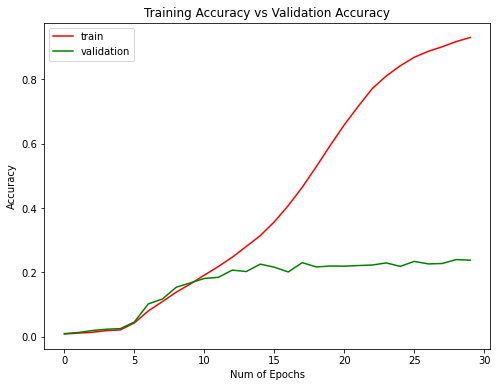

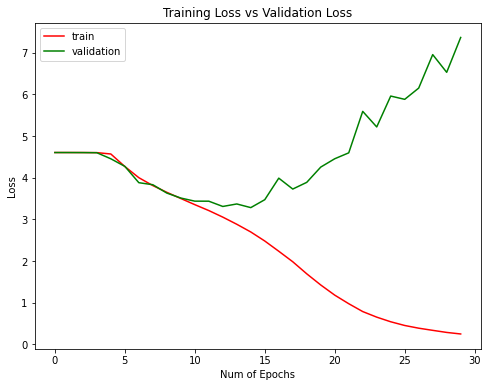

In [50]:
plt.figure(0)  
plt.plot(log_data['acc'],'r')  
plt.plot(log_data['val_acc'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(log_data['loss'],'r')  
plt.plot(log_data['val_loss'],'g') 
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

Matriz de confusión

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas

In [52]:
vgg16_pred = modelt.predict(x_test_resized, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16_pred, axis=1)  

313/313 [==============================] - 328s 1s/step


Con la librería Scikit Learn, generamos la matriz de confusión y la dibujamos (aunque el gráfico no es muy bueno debido al numero de etiquetas).

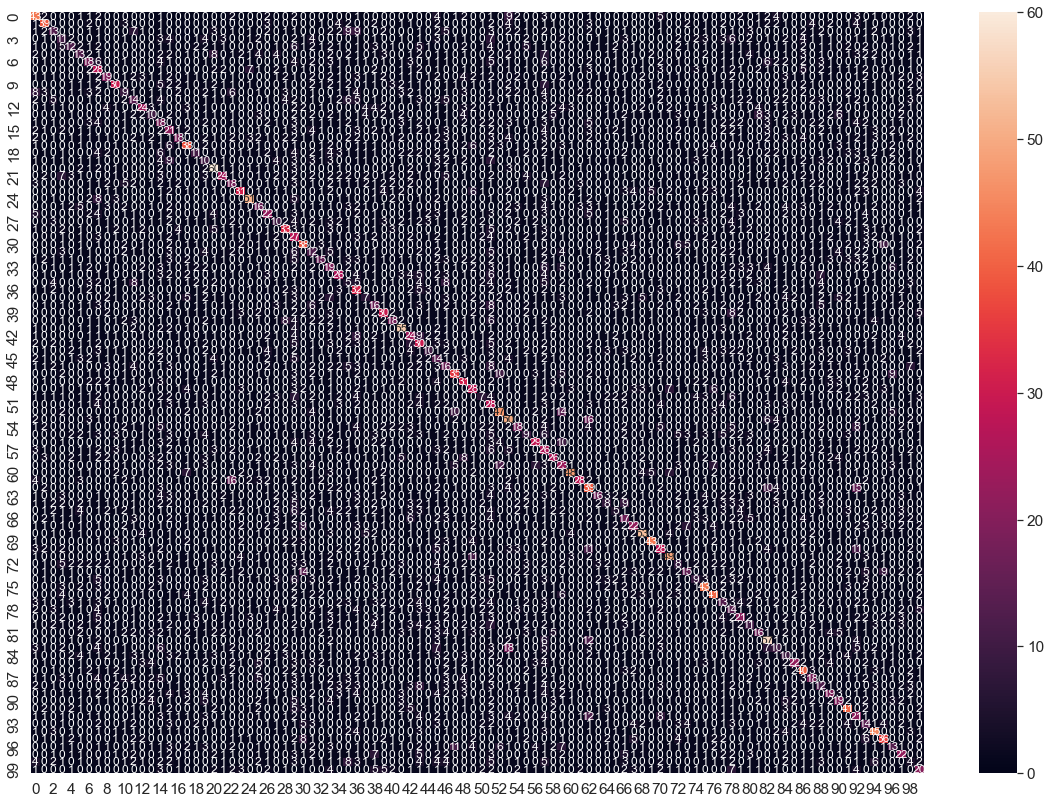

In [53]:
#Creamos la matriz de confusión
vgg16_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg16_predicted)

# Visualiamos la matriz de confusión
vgg16_df_cm = pd.DataFrame(vgg16_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg16_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

Y por último, mostramos las métricas:

In [54]:
vgg16_report = classification_report(np.argmax(y_test, axis=1), vgg16_predicted)  
print(vgg16_report)

              precision    recall  f1-score   support

           0       0.35      0.43      0.39       100
           1       0.43      0.39      0.41       100
           2       0.22      0.13      0.16       100
           3       0.12      0.11      0.12       100
           4       0.21      0.12      0.15       100
           5       0.15      0.13      0.14       100
           6       0.20      0.18      0.19       100
           7       0.17      0.28      0.22       100
           8       0.28      0.19      0.23       100
           9       0.39      0.30      0.34       100
          10       0.13      0.09      0.11       100
          11       0.15      0.14      0.15       100
          12       0.37      0.24      0.29       100
          13       0.18      0.10      0.13       100
          14       0.11      0.18      0.14       100
          15       0.15      0.21      0.17       100
          16       0.34      0.18      0.24       100
          17       0.36    

Curva ROC (tasas de verdaderos positivos y falsos positivos)

/var/folders/2t/x__65ygj1xs_g_ph8vs366bc0000gn/T/ipykernel_3151/1969473030.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


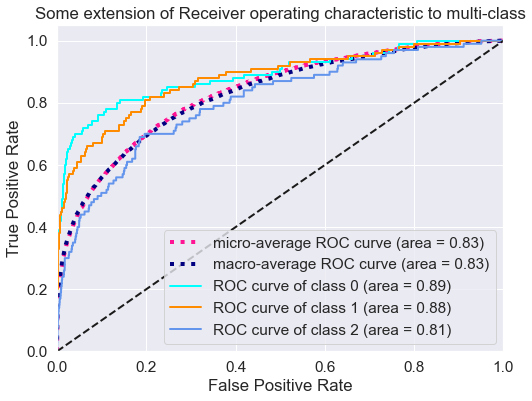

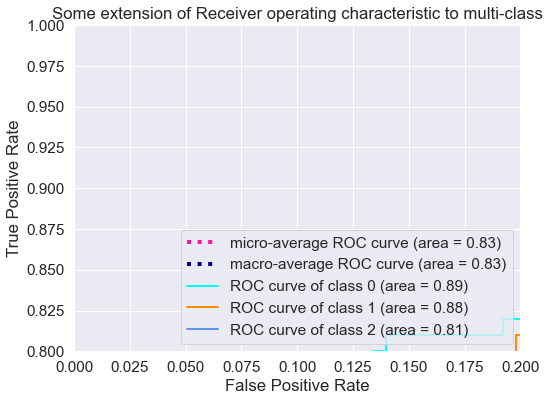

In [55]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg16_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg16_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

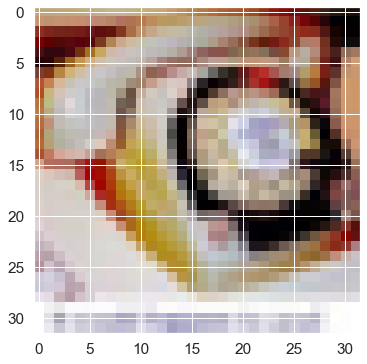

class for image 8: 23
predicted:         23


In [69]:
imgplot = plt.imshow(x_train_original[5])  
plt.show()  
print('class for image 8: ' + str(np.argmax(y_test[8])))  
print('predicted:         ' + str(vgg16_predicted[8]))  

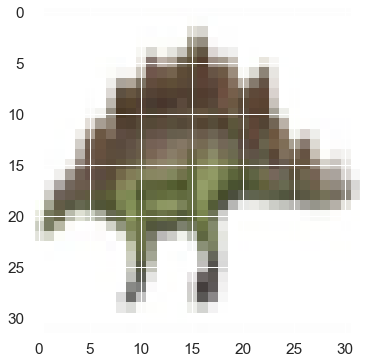

class for image 1: 33
predicted:         97


In [58]:
imgplot = plt.imshow(x_train_original[1])  
plt.show()  
print('class for image 1: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(vgg16_predicted[1])) 

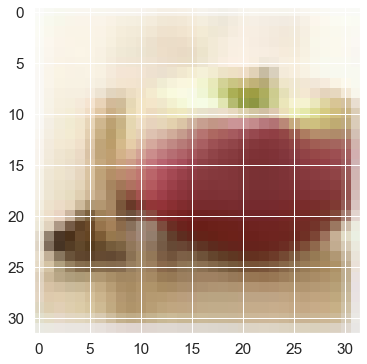

class for image 2: 72
predicted:         15


In [59]:
imgplot = plt.imshow(x_train_original[2])  
plt.show()  
print('class for image 2: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(vgg16_predicted[2])) 

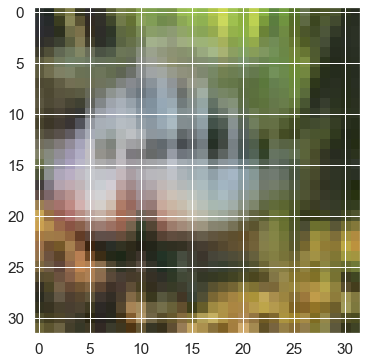

class for image 3: 71
predicted:         71


In [64]:
imgplot = plt.imshow(x_train_original[4])  
plt.show()  
print('class for image 3: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(vgg16_predicted[4]))  

Hemos querido usar un modelo predeterminado, obligándonos a modificar la imagen original haciéndola más grande. Como la imagen es de 32x32 píxeles, pues la imagen resultante queda peor y aprende peor.